# Overview

Let's do some classification.

**Note: This is still a work-in-progress. Getting some funky result. Will revisit.**

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns

sns.set(style="darkgrid")

## Dataset as Dataframe

Let's load the dataset. We want to combine 2 arrays `data` and `target` in the toy dataset wine into 1 dataframe using `c_` concatenate function in `numpy`. Also update the column names accordingly so that headers match the data columns.

Description of the wine dataset is available [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset).

| Target | Class   |
|--------|---------|
| 0      | Class_0 |
| 1      | Class_1 |
| 2      | Class_2 |

In [44]:
wine = load_wine()
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0


In [45]:
# Let's get a sense of the overall dataset.
print('Dimension:', df.shape)
print('Stats:')
print(df.describe())

Dimension: (178, 14)
Stats:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453        

The key to any ML modeling is to understand which variable we are trying to predict. So that we split the dataset into variables X and y.

X = the variables that will influence the prediction
y = the dependent variable representing the prediction.

In [46]:
# Select all columns except for the last. Remember that our last column is the dependent variable target.
X_df = df.iloc[:, :-1]
X_df.head(3)  # Preview of X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


We now select the last column and assign it to y.

In [47]:
y_df = df.iloc[:, -1]   # Take the last column
y_df.head(3)            # Preview of y

0    0.0
1    0.0
2    0.0
Name: target, dtype: float64

### Visualize

Let's visualize the dataset. Intuitively, we see 3 distinct clusters formed.

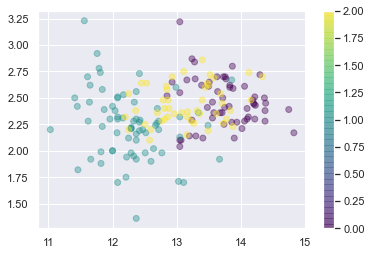

In [48]:
plt.scatter(df['alcohol'],df['ash'], c=y_df, alpha=0.4, cmap='viridis')
plt.colorbar()

## Dataset as Arrays

In the previous section, we had set the data as dataframe, which is a nice data structure conducive for EDA. But we can just keep it simple and just use the loaded data `iris` directly. The follow snippet achieve the same scatter plot as the one above.

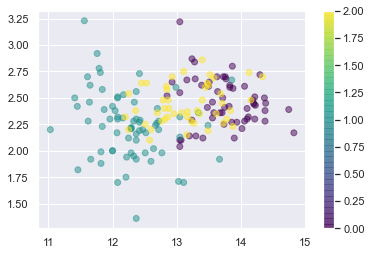

In [49]:
X, y = wine.data, wine.target
plt.scatter(X[:, 0],X[:, 2], c=y, alpha=0.5, cmap='viridis')
plt.colorbar()

## Training and Test Datasets

Let's prepare the dataset for some ML modeling. First let's create training data that we can use to train a ML model.

## Classifiers

Classifiers are ML models that we will use for the machine to predict whether a given Iris plant is a setosa, versicolour, or virginica.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=33)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Setup the classifiers

names = ['Nearest Neighbors', 'Logistic Regression', 'Linear SVM', 'Random Forest']

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(max_iter=3000, class_weight='balanced', solver='lbfgs'),
    SVC(kernel='linear', random_state=0),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

for name, clf in zip(names, classifiers):
    print('Running %s' % name)

    clf = clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    print('Train accuracy: %.3f%%' % (score * 100.0))

    Z = clf.predict(X_test)
    print('Accuracy: %.3f%%' % (sum(Z == y_test) / float(len(y_test))*100.0))
    print()

Running Nearest Neighbors
Train accuracy: 81.132%
Accuracy: 59.722%

Running Logistic Regression
Train accuracy: 99.057%
Accuracy: 95.833%

Running Linear SVM
Train accuracy: 100.000%
Accuracy: 81.944%

Running Random Forest
Train accuracy: 100.000%
Accuracy: 95.833%



# References

* [Scikit-Learn: Classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)